<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/posgrado/teoria/06 - Metodologias de Cross Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-Validation

El cross-validation (o validación Cruzada) es un método estadístico que nos ayuda a estimar la performance de los modelos de machine learning. Nos ayudará a que nuestros modelos generalicen mejor y así poder tener mejores resultados con un conjunto de datos independiente. Como hemos visto anteriormente, uno de los grandes problemas en Machine Learning es el overfitting. Decimos que un modelo genera _overfitting_ cuando se ajusta muy bien a la base de entrenamiento pero no generaliza y cuando se presenta un conjunto de datos independientes a la base de entrenamiento, los resultados son malos.
![imagen](https://miro.medium.com/max/1200/1*YQ5tjb1TqNHenYMFk2tPog.png)  

### ¿Cómo logramos mejorar el overfitting usando Cross-Validation?
la técnica de validación cruzada genera mini data sets de entrenamiento-testeo desde una base de entrenamiento inicial. Se utilizan estas divisiones de bases para _tunear_ el modelo. Dentro de la técnica existe un parámetro fundamental denominado k-fold. Este parámetro nos indicará en cuantas particiones se dividirá la base de entrenamiento inicial. Luego entrenaremos de forma iterativa nuestro algoritmo (cualquier algoritmo elegido para predecir) en k-1 partición mientras la partición restante la utilizaremos como base de _testing_. Iteramos k veces la corrida de los algoritmos y en todas las corridas la partición de _testing_ será diferente.
![imagen](https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/5-fold-cv.jpeg)  

Los resultados de los modelos generalmente poseen menos sesgo y también son menos optimistas que aquellos modelos entrenados con la clásica división en train/test. Un punto a tener en cuenta es que cuando una observación es asignada a un fold, esta observación quedará hasta que termine el procedimiento en dicho fold.  
El parámetro k debe ser elegido con cuidado, dependiendo las observaciones que se poseen. Si se elige mal el mismo, se puede caer en un modelo cuyo score posee alta varianza o alto sesgo.

Las diferentes técnicas de cross-validation son:

1.  **Hold Out Cross-validation**:
![imagen](https://editor.analyticsvidhya.com/uploads/18265Screenshot-from-2020-10-06-16-35-50-768x432.png)  
En esta técnica, el dataset es particionado en tres partes. El primer modelo es ejecutado por subset de _train_, luego dicho modelo es entrenado por un dataset de _test_. En una segunda iteración, la parte de _train_ y _test_ son unidas y entrenan al segundo modelo, utilizando una tercera partición como _test_.
Esta técnica tiene como ventaja la velocidad de ejecución pero como desventaja que no se puede utilizar en dataset muy desbalanceados, ya que al realizar los cortes corremos el riesgo de contar con muy pocos casos cuyo _label_ queremos identificar.

2.   **K-Fold Cross-validation**:
![](https://editor.analyticsvidhya.com/uploads/16042grid_search_cross_validation.png)  
El dataset de entrenamiento se divide en k particiones de igual tamaño. Cada partición se lo denomina _fold_. Un fold es usado como validación mientras los restantes son usados como vase de entrenamiento. Esta técnica se repite k veces, en cada repetición se cambia el fold usado como validación.
El valor final del modelo se computará como la media de las probabilidades de cada modelo.  
**Ventajas**: Todo el data set es utilizado tanto para entrenar como para validar.  
**Desventajas**: Los problemas se pueden dar cuando las bases son desbalanceadas, porque se corre el riesgo de que una de las particiones qude sólo un target. 
Además no es muy recomendado cuando hay una serie de datos ya que el orden de los ejemplos importa.

3.   **Stratified K-Fold Cross-validation**:
![](https://editor.analyticsvidhya.com/uploads/65912Stratified.png)  
Es una variante de la versión k-fold cross-validation que es muy utilizada cuando las bases se encuentran desbalanceadas. Se dividen en k-folds de igual tamaño pero utilizando las mismas proporciones de target en todos los subsets.  
**Ventajas**: Funcionan perfecto para bases desbalanceadas ya que todos los subsets representan de buena forma al data set original.  
**Desventajas**: Como en el caso anterior, no son recomendados para datos de series de tiempos.

4. **Leave P Out cross-validation**:
Es una técnica de cross-validation exhaustiva, en donde se utiliza p ejemplos para validación y los casos restantes (n-p) son usados para entrenar. 
Por ejemplo, si tenemos un dataset de 100 observaciones y nuestro p=10, en cada iteración utilizaríamos 90 casos para entrenar y 10 para validar. El proceso se repetirá hasta que todo el data set sea dividido en la muestra p de validación y en la muestra n-p de entrenamiento.  
**Ventajas**: Toda la base de datos es usada como entrenamiento y también como validación.  
**Desventajas**: Requiere mucho procesamiento de máquina. Además no sirve para bases desbalanceadas.

5. **Leave One Out cross-validation**:  
![](https://editor.analyticsvidhya.com/uploads/719101*26vyRHpqGbVAwJq_csUqZQ.gif)  
Esta técnica es una particularidad de la técnica anterior, en donde el p elegido es 1. Como la anterior es una técnica exhaustiva de entrenamiento y validación. Se repiten los entrenamientos de modelos hasta que todas las observaciones hayan sido validacion.

6. **Monte Carlo Cross-Validation(Shuffle Split)**
![](https://editor.analyticsvidhya.com/uploads/91885Shuffle.png)  
Esta técnica también es conocida como _shuffle split_ y es una estrategia muy flexible de cross-validation. Se dinivde de forma aleatoria los set de entrenamiento y validación.
Se decide de antemano el porcentaje utilizado como training y como validación. Por ejemplo si se define cómo como entrenamiento un 60% y para validación un 20%, el restante 20% no es utilizado. El proceso se repite n veces (definidas de antemano)  
**Ventajas**: Se puede definir un porcentaje de entrenamiento y validación adecuado para el usuario. Se puede definir el número de repeticiones sin depender del número de folds por ejecución  
**Desventajas**: No sirve para bases desbalanceadas y además dependiendo de los porcentajes elegidos puede pasar que algunos registros queden sin ser utilizados.

7. **Time Series Cross-Validation**:
![](https://editor.analyticsvidhya.com/uploads/852372020-03-27-image1.png)  
Los datos de series de tiempo son recolectados en diferente puntos del tiempo. Por esta particularidad, los períodos de tiempo pueden tener correlación entre las observaciones. Esta es una de las difetrencias entre esta técnica y las anteriores.
En caso de las series de tiempo, los datos no pueden ser elegidos de forma aleatoria y así ser asignadas a entrenamiento y validación ya que el orden es importante, los datos son separados entre entrenamiento y validación de acuerdo al tiempo, este proceso se lo denomina _foward chaining_ o _rolling cross-validation_.


In [1]:
import pandas as pd
import numpy as np
#Este seteo de pandas sirve para que se puedan visualizar todas las columnas
#del dataframe#############################
pd.set_option('display.max_columns', None)#
###########################################

#Esta librería sirve para que oculte todo tipo de warnings que puedan 
#aparecer en el código. Generalmente si una función está por ser data de 
#baja o modificada en una librería, varias versiones antes aparecen estos
#tipos de advertencias cuando se ejecuta el código
import warnings###################
warnings.filterwarnings("ignore")#
##################################

#########################################################
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, cross_validate
#########################################################

#Definimos las métricas
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
#Importo el modelo de arbol de decisión
from sklearn import tree
import lightgbm 
import os
from google.colab import drive

### Monto la carpeta de Drive

In [2]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


### Levanto la base 

In [3]:
data = pd.read_csv("{}/casosCovidProcesada.txt".format(contentFolder), sep=";")
X = data.drop(columns = ["id_evento_caso", "fallecido"])
y = data.fallecido

## K-Fold Cross-validation

In [4]:
kf=KFold(n_splits=5, random_state = 30, shuffle = True)

### Primera implementacion usando cross_validate [Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html?highlight=cross_val#sklearn.model_selection.cross_validate)

In [5]:
treeModel = tree.DecisionTreeClassifier(max_depth=3)
treeModels=cross_validate(treeModel,X,y,cv=kf, return_estimator =True, scoring = "roc_auc")

In [6]:
treeModels

{'fit_time': array([ 9.69957304,  9.3080101 , 11.27928519, 10.09985638, 10.29535723]),
 'score_time': array([0.69433427, 0.64107633, 0.6466856 , 0.65153289, 0.96998501]),
 'estimator': [DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3)],
 'test_score': array([0.91790869, 0.91942631, 0.9202038 , 0.91831494, 0.92175569])}

#### Obtengo el AUC Promedio

In [7]:
#AUC Promedio
treeModels["test_score"].mean()

0.9195218849577316

### Otra implementacion de K-Folds donde se tiene mayor control de las particiones y de los modelos creados

In [32]:
baseFinal = pd.DataFrame()
modelosEntrenados = []
# X is the feature set and y is the target
for train_index, test_index in kf.split(X,y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    aux = X_test.copy()
    aux["target"] = y_test
    learner = tree.DecisionTreeClassifier(max_depth=3)
    #Entreno el modelo con la informacion de train
    learner.fit(X_train, y_train)
    modelosEntrenados.append(learner)
    aux["treeScore"] = learner.predict_proba(X_test)[:,1]
    baseFinal = baseFinal.append(aux)

#### Genero curva ROC

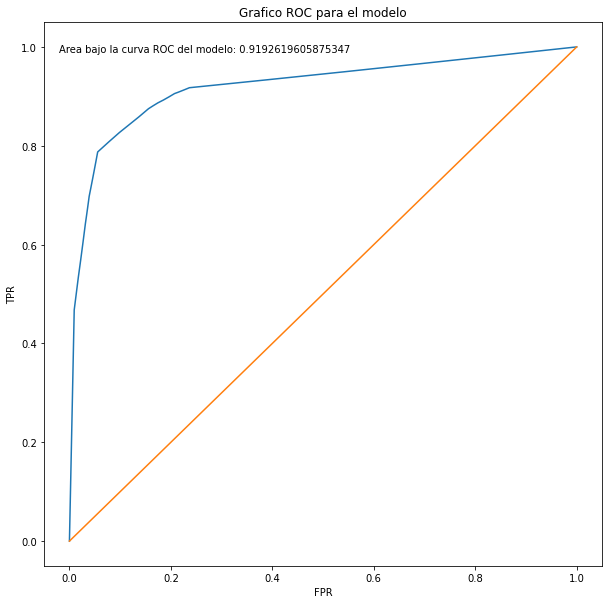

In [36]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRoc = roc_auc_score(baseFinal.target, baseFinal.treeScore)
fpr, tpr, _ = roc_curve(baseFinal.target, baseFinal.treeScore)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

## Stratified K-Fold Cross-validation

El unico cambio que se realiza es en la forma de difivir los folds

In [ ]:
kf=StratifiedKFold(n_splits=5)

In [ ]:
treeModel = tree.DecisionTreeClassifier(max_depth=3)
treeModels=cross_validate(treeModel,X,y,cv=kf, return_estimator =True, scoring = "roc_auc")

In [ ]:
#AUC Promedio
treeModels["test_score"].mean()

0.9171610149582362

#### Otra forma de implementar 

In [ ]:
baseFinal = pd.DataFrame()
modelosEntrenados = []
# X is the feature set and y is the target
for train_index, test_index in kf.split(X,y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    aux = X_test.copy()
    aux["target"] = y_test
    learner = tree.DecisionTreeClassifier(max_depth=3)
    #Entreno el modelo con la informacion de train
    learner.fit(X_train, y_train)
    modelosEntrenados.append(learner)
    aux["treeScore"] = learner.predict_proba(X_test)[:,1]
    baseFinal = baseFinal.append(aux)

#### Genero curva ROC

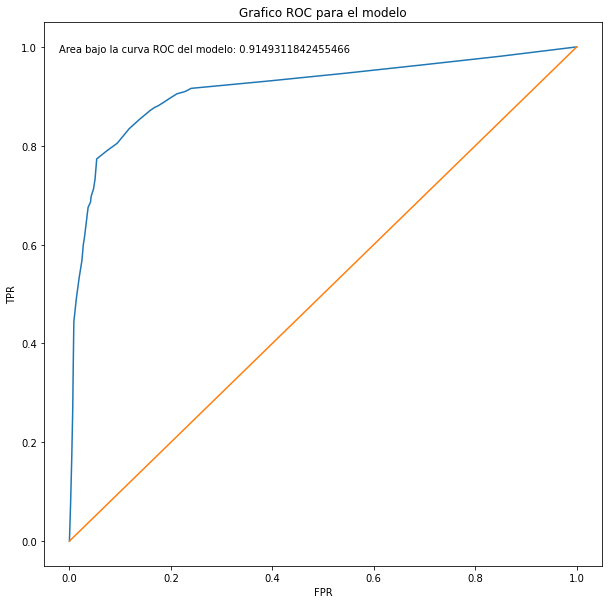

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRoc = roc_auc_score(baseFinal.target, baseFinal.treeScore)
fpr, tpr, _ = roc_curve(baseFinal.target, baseFinal.treeScore)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()

## Monte Carlo Cross-Validation (Shuffle Split)

In [37]:
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

In [38]:
treeModel = tree.DecisionTreeClassifier(max_depth=3)
treeModels=cross_validate(treeModel,X,y,cv=shuffle_split, return_estimator =True, scoring = "roc_auc")

In [39]:
treeModels["test_score"].mean()

0.9187438671804944